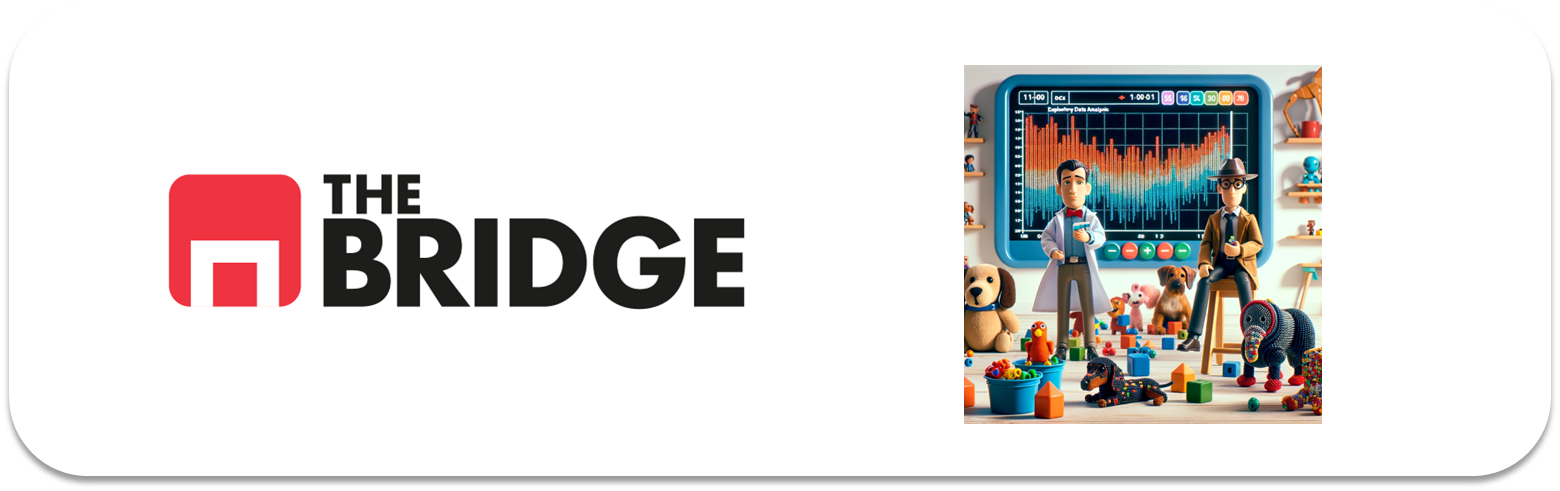

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from bootcampviztools import *


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
df_titanic.drop(["deck","survived","pclass","embarked"],axis = 1, inplace = True)
df_titanic.head(5)

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [4]:
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]
df_titanic.drop(["parch","sibsp"],axis = 1, inplace = True)
df_titanic.head(5)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [5]:
df_titanic.loc[df_titanic["embark_town"].isna()]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
61,female,38.0,80.0,First,woman,False,NaN,yes,True,0
829,female,62.0,80.0,First,woman,False,NaN,yes,True,0


In [6]:
df_titanic["embark_town"].fillna(df_titanic["embark_town"].mode()[0],inplace=True)
df_titanic.loc[df_titanic["embark_town"].isna()]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [7]:
df_titanic.loc[df_titanic["age"].isna()]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
5,male,NaN,8.4583,Third,man,True,Queenstown,no,True,0
17,male,NaN,13.0000,Second,man,True,Southampton,yes,True,0
19,female,NaN,7.2250,Third,woman,False,Cherbourg,yes,True,0
26,male,NaN,7.2250,Third,man,True,Cherbourg,no,True,0
28,female,NaN,7.8792,Third,woman,False,Queenstown,yes,True,0
...,...,...,...,...,...,...,...,...,...,...
859,male,NaN,7.2292,Third,man,True,Cherbourg,no,True,0
863,female,NaN,69.5500,Third,woman,False,Southampton,no,False,10
868,male,NaN,9.5000,Third,man,True,Southampton,no,True,0
878,male,NaN,7.8958,Third,man,True,Southampton,no,True,0


In [8]:
df_titanic.groupby("who")["age"].mean()

who
child     6.369518
man      33.173123
woman    32.000000
Name: age, dtype: float64

In [9]:
df_titanic["age"].fillna(df_titanic.groupby("who")["age"].transform("mean"),inplace=True)

In [10]:
df_titanic.loc[df_titanic["age"].isna()]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members


In [11]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

___

#### RESPUESTA A1:  
1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?
- Variables a tener en cuenta:
    - who y alive

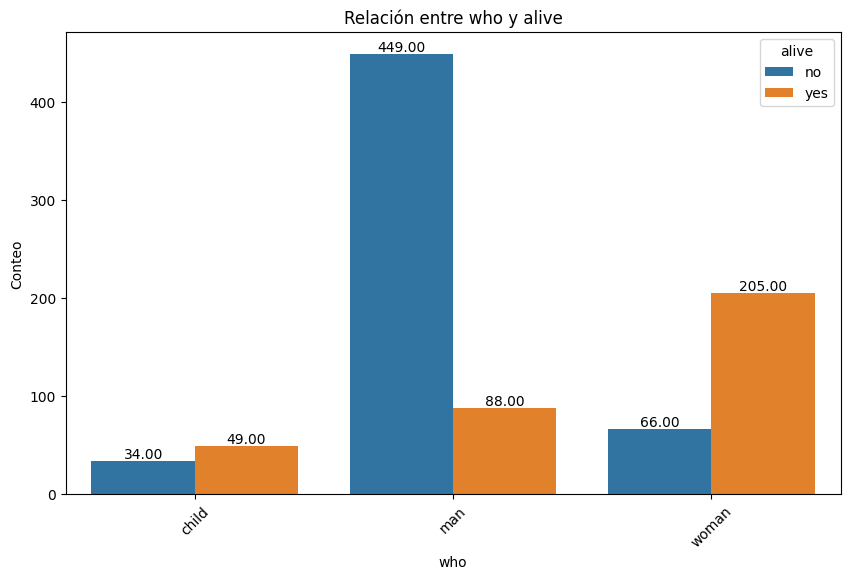

In [12]:
plot_categorical_relationship_fin(df_titanic,"who","alive",show_values=True)

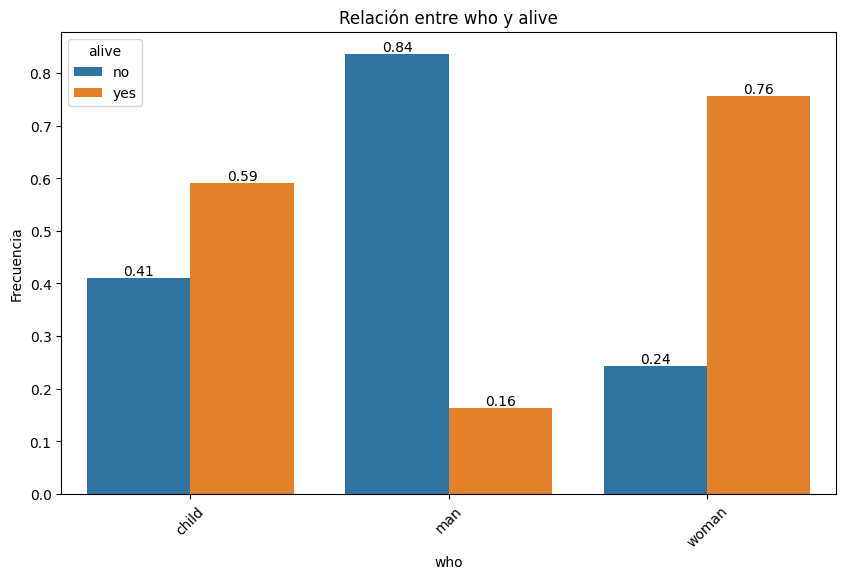

In [13]:
plot_categorical_relationship_fin(df_titanic,"who","alive",relative_freq=True,show_values=True)

In [14]:
from scipy.stats import chi2_contingency

tabla_contingencia = pd.crosstab(df_titanic["who"], df_titanic["alive"])
tabla_contingencia

alive,no,yes
who,,
child,34,49
man,449,88
woman,66,205


In [15]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414  31.85858586]
 [330.87878788 206.12121212]
 [166.97979798 104.02020202]]


CONCLUSIONES:  
- Del total de mujeres sobrevivieron el 76%
- Del total de niños, sobrevivieron 59%
- Del total de hombres, sobrevivieron 16%.

- El valor del Chi_cuadrado combinado con el pvalor hace que exista un relación estadísticamente significativa entre el sexo y haberse salvado o no (se rechaza la hipótesis nula (H0)).

___

#### RESPUESTA A 2:

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

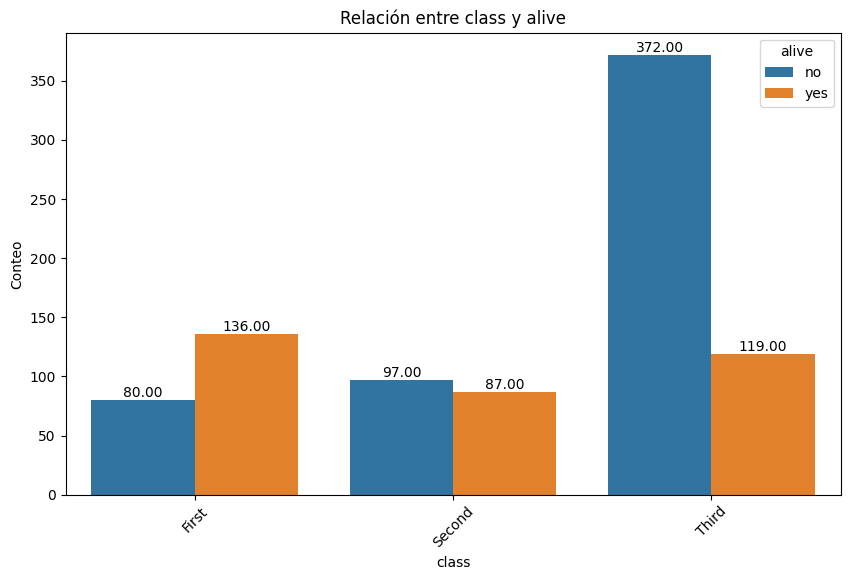

In [16]:
plot_categorical_relationship_fin(df_titanic,"class","alive",show_values=True)

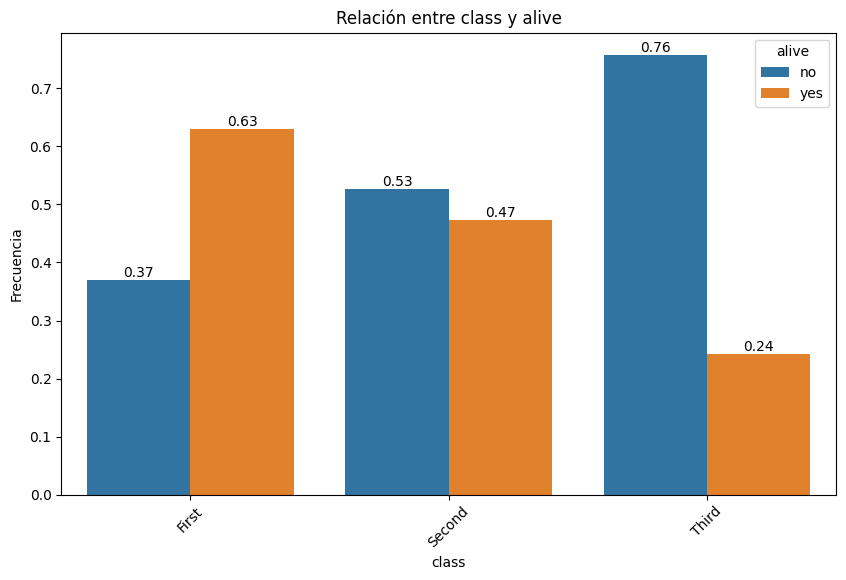

In [17]:
plot_categorical_relationship_fin(df_titanic,"class","alive",relative_freq=True,show_values=True)

In [18]:
from scipy.stats import chi2_contingency

tabla_contingencia = pd.crosstab(df_titanic["class"], df_titanic["alive"])
tabla_contingencia

alive,no,yes
class,,
First,80,136
Second,97,87
Third,372,119


In [19]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


CONCLUSIONES:
- Tanto en términos absolutos como erlativos sobrevivieron más personas de primera clase.
- La prueba chi-cuadrado junto con el pvalor indican que sí existe una relación estadísticamente significativa entre ser pasajero de una clase u otra y haberse salvado o no.

___

#### RESPUESTA A 3:
- 3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

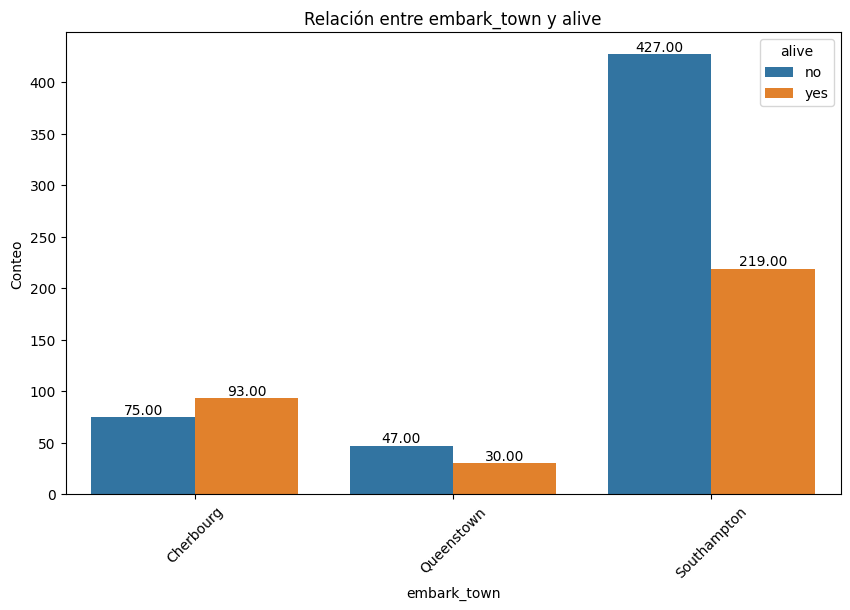

In [20]:
plot_categorical_relationship_fin(df_titanic,"embark_town","alive",show_values=True)

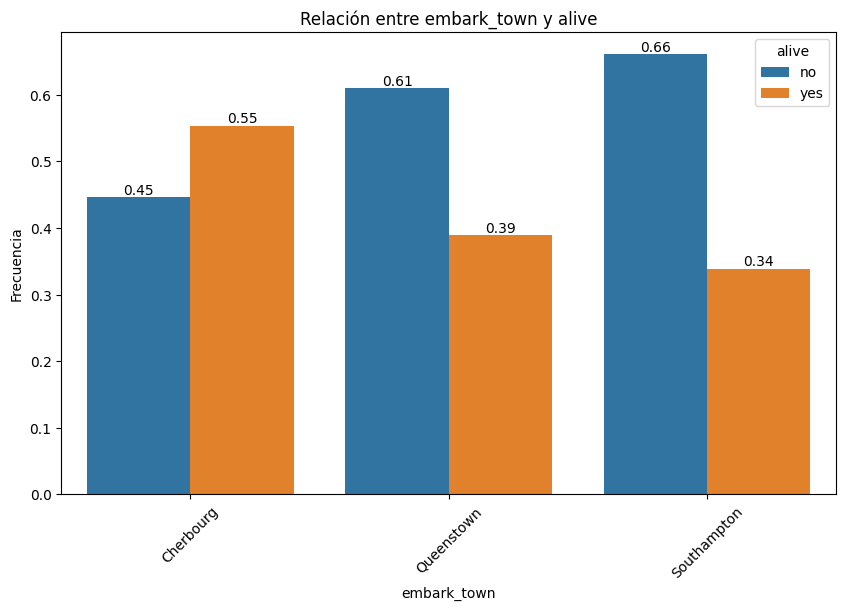

In [21]:
plot_categorical_relationship_fin(df_titanic,"embark_town","alive",relative_freq=True,show_values=True)

In [22]:
tabla_contingencia = pd.crosstab(df_titanic["embark_town"], df_titanic["alive"])
tabla_contingencia

alive,no,yes
embark_town,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,219


In [23]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  64.48484848]
 [ 47.44444444  29.55555556]
 [398.04040404 247.95959596]]


CONCLUSIONES:
- En términos absolutos se salvaron más personas de Southampon, sin embargo en términos relativos se salvaron más de Cherboroug.
- Los de Queenston, que eran de los que menos pasajeros se subieron, curiosamente tuvo una tasa de supervivencia mayor que los de Southampton.
- La prueba chi-cuadrado junto con el pvalor indican que sí existe una relación estadísticamente significativa entre haberse subido en una u otra ciudad y haberse salvado o no.

___

#### RESPUESTA A 4:
4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

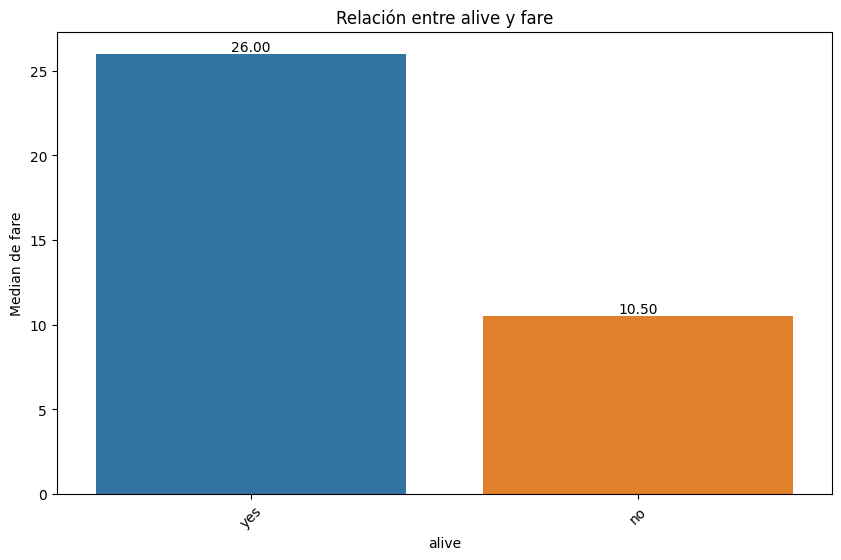

In [24]:
plot_categorical_numerical_relationship(df_titanic,"alive","fare",show_values=True,measure="median")

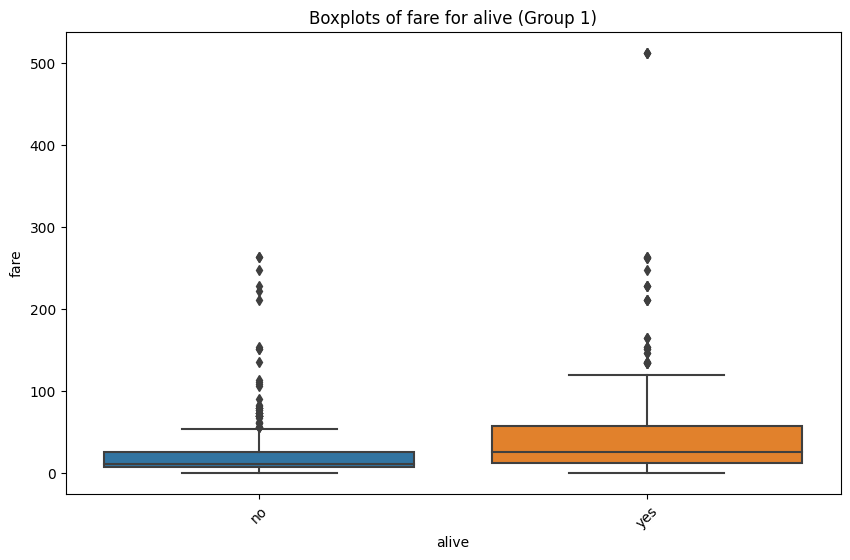

In [25]:
plot_grouped_boxplots(df_titanic,"alive","fare")

In [26]:
# Prueba U de Mann-Whitney
from scipy.stats import mannwhitneyu

grupo_a = df_titanic.loc[df_titanic.alive == "yes"]["fare"]
grupo_b = df_titanic.loc[df_titanic.alive == "no"]["fare"]

statistic, p_value = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U de Mann-Whitney:", statistic)
print("Valor p:", p_value)

Estadístico U de Mann-Whitney: 129951.5
Valor p: 4.553477179250237e-22


CONCLUSIONES:
- Existe diferencia estadisticamente significativa entre el precio pagado del billete y haber sobrevivido

____

#### RESPUESTA A 5:
5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

In [27]:
df_titanic.loc[df_titanic["fare"]==0]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
179,male,36.000000,0.0,Third,man,True,Southampton,no,True,0
263,male,40.000000,0.0,First,man,True,Southampton,no,True,0
271,male,25.000000,0.0,Third,man,True,Southampton,yes,True,0
277,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
302,male,19.000000,0.0,Third,man,True,Southampton,no,True,0
413,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
466,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
481,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
597,male,49.000000,0.0,Third,man,True,Southampton,no,True,0
633,male,33.173123,0.0,First,man,True,Southampton,no,True,0


In [28]:
df_titanic.loc[df_titanic["fare"]==0, ["sex","class"]].value_counts()

sex   class 
male  Second    6
      First     5
      Third     4
Name: count, dtype: int64

- Fueron 15 personas, todos hombres.
- 5 de primera clase, 6 de segunda y 4 en tercera.
- Todos subieron en Southampton
- Puede que fueran parte de la tripulación o de los espectáculos de a bordo (músicos...) o simplemente que no se registrase correctamente los billetes.
- Todos menos uno fallecieron

In [29]:
df_titanic.loc[df_titanic["fare"]>400]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0


- Hubo tres personas que abonaron esa cantidad. Una mujer y dos hombres.
- Los tres sobrevivieron (el dinero parece que te puede salvar la vida ;-).

___

#### RESPUESTA A 6:
6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

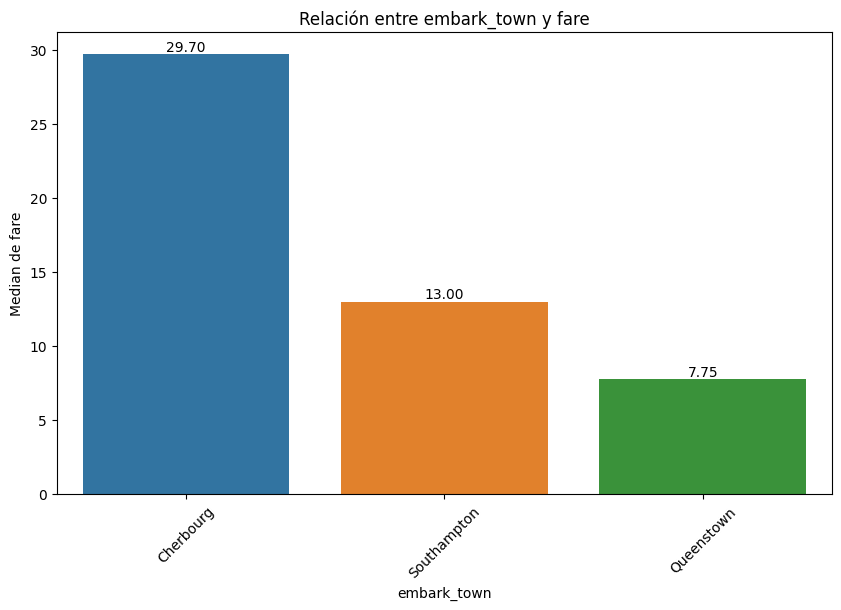

In [30]:
plot_categorical_numerical_relationship(df_titanic,"embark_town","fare",show_values=True,measure=("median"))

-Sí hay relación significativa entre los importes del dinero pagado y de dónde se subieron los pasajeros.

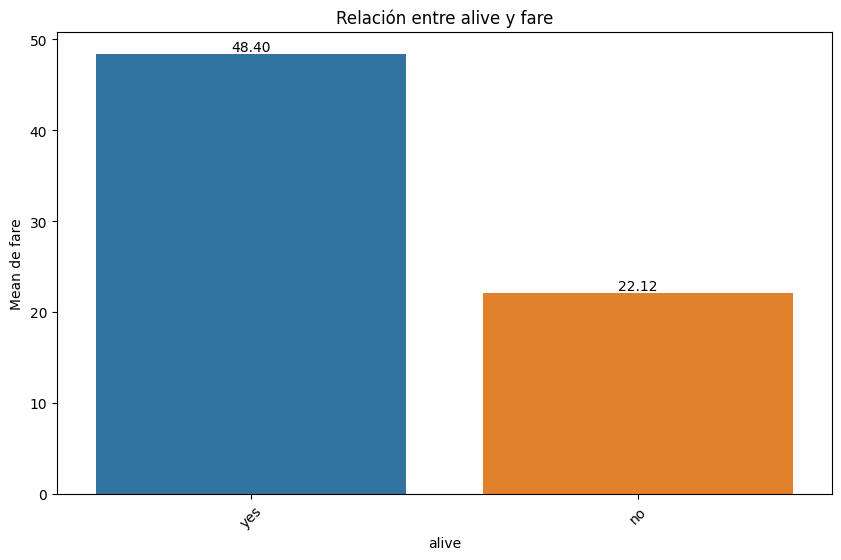

In [31]:
plot_categorical_numerical_relationship(df_titanic,"alive","fare",show_values=True)

- También hay evidencia significaiva de quien más dinero abonó (en comparación con la media) tuvo más probabilidad de supervivencia.

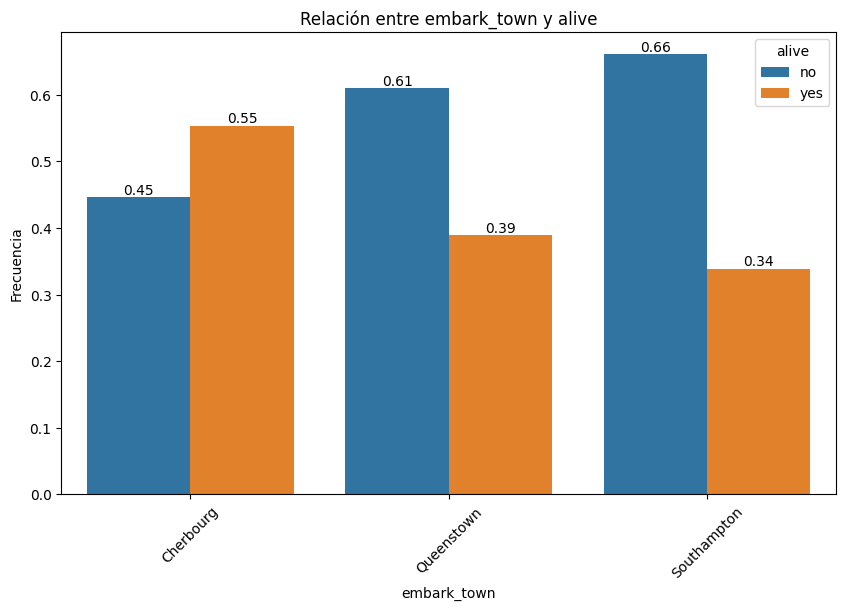

In [32]:
plot_categorical_relationship_fin(df_titanic,"embark_town","alive",relative_freq=True,show_values=True)

- Como hemos comentado antes parece que los que Cherbourg tuvieron un % de supervivencia superior a pesar de ser el menor grupo de pasajeros.

___

#### RESPUESTA A 7:
7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

In [33]:
df_titanic["fare"].describe().round(2)

count    891.00
mean      32.20
std       49.69
min        0.00
25%        7.91
50%       14.45
75%       31.00
max      512.33
Name: fare, dtype: float64

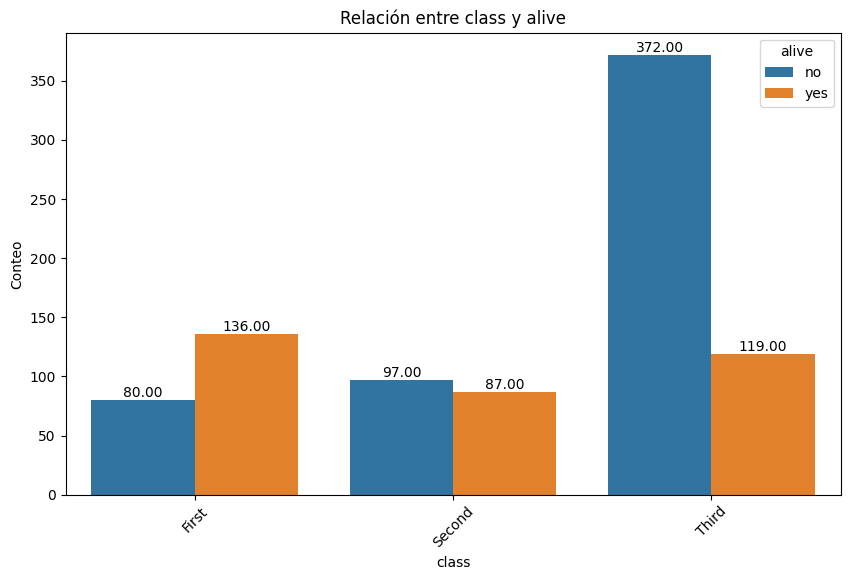

In [34]:
plot_categorical_relationship_fin(df_titanic,"class","alive",show_values=True)

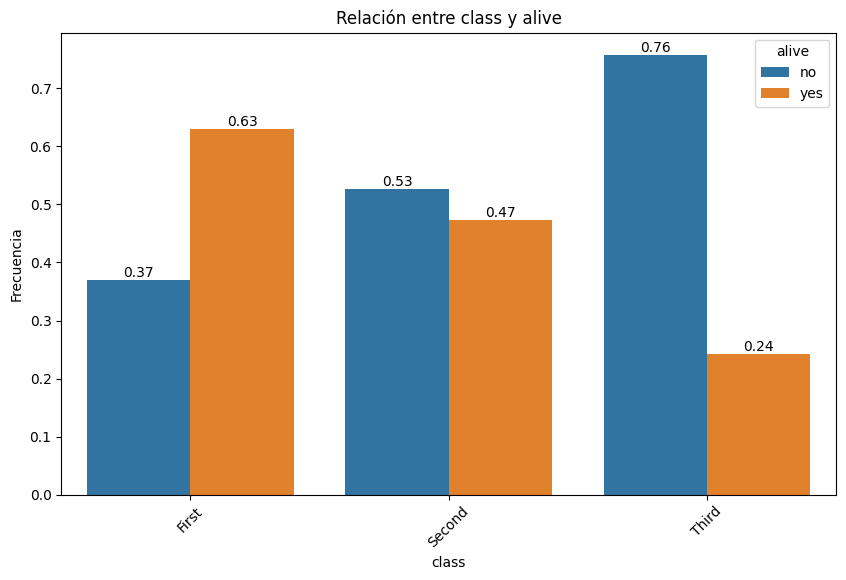

In [35]:
plot_categorical_relationship_fin(df_titanic,"class","alive",show_values=True,relative_freq=True)

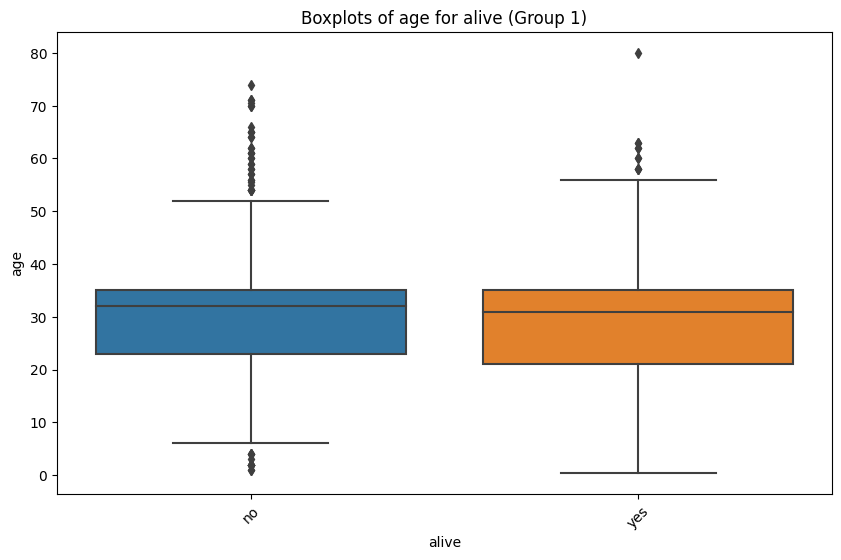

In [36]:
plot_grouped_boxplots(df_titanic,"alive","age")

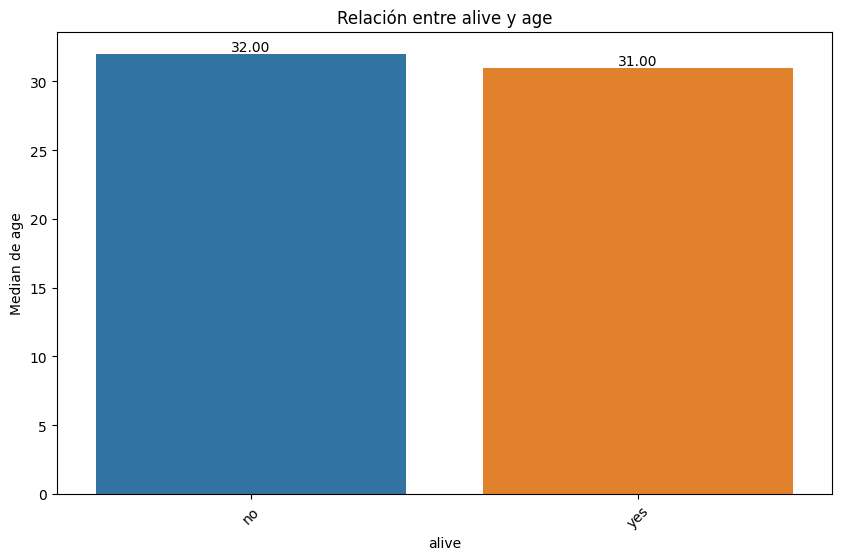

In [37]:
plot_categorical_numerical_relationship(df_titanic,"alive","age",show_values=True,measure="median")

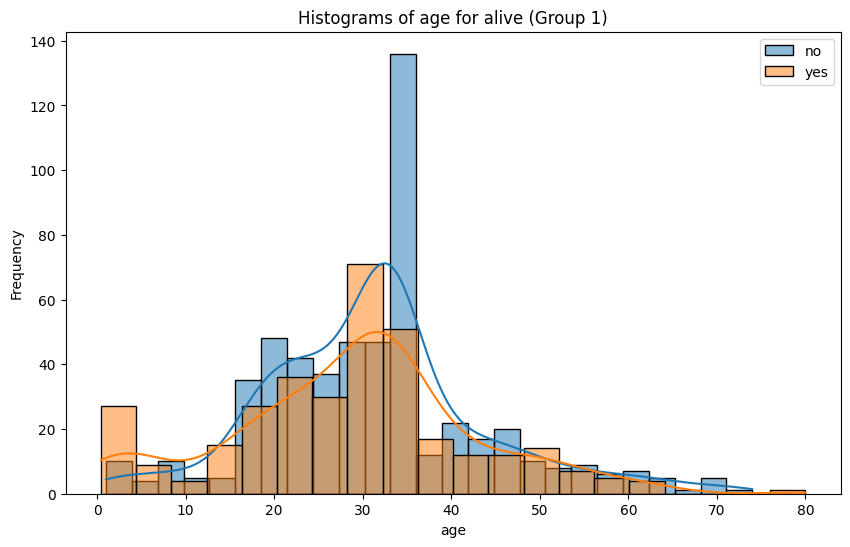

In [38]:
plot_grouped_histograms(df_titanic,"alive","age",2)

In [39]:
# Saco datos de los niños menores de 5 años que se ve por la gráfica que tienen una supervivencia en mayor proporción que el resto de nuiños
df_titanic[(df_titanic["age"]<5) & (df_titanic["alive"]=="yes")].shape[0]/df_titanic[(df_titanic["age"]<5) & (df_titanic["alive"]=="no")].shape[0]

2.076923076923077

In [40]:
# Saco los datos de las perosnas entre 28 y 33 años aproximadamente.
df_titanic[(df_titanic["age"]>28) & (df_titanic["age"]<33) & (df_titanic["alive"]=="yes")].shape[0]/df_titanic[(df_titanic["age"]>28) & (df_titanic["age"]<33) & (df_titanic["alive"]=="no")].shape[0]

1.0746268656716418

In [41]:
# Los datos de las personas entre 33 y 36 años aproximadamente que muestra una mayor tasa de no haber sobrevivido.
df_titanic[(df_titanic["age"]>33) & (df_titanic["age"]<36) & (df_titanic["alive"]=="yes")].shape[0]/df_titanic[(df_titanic["age"]>33) & (df_titanic["age"]<36) & (df_titanic["alive"]=="no")].shape[0]

0.264

CONCLUSIONES:
- Los que más sobrevivieron fueron personas entre 28-32 años
- Los que menos sobrevivieron fueron perosnas entre 33-36 años aprox.
- Se observa un elevado ratio de supervivencia entre los menores de 5 años aproximadamente.

#### RESPUESTA A 8: 
8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [43]:
col_directora = "alive"
col_1 = "age"
col_2 = "fare"
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]]

¿Ha sobrevivido?: no


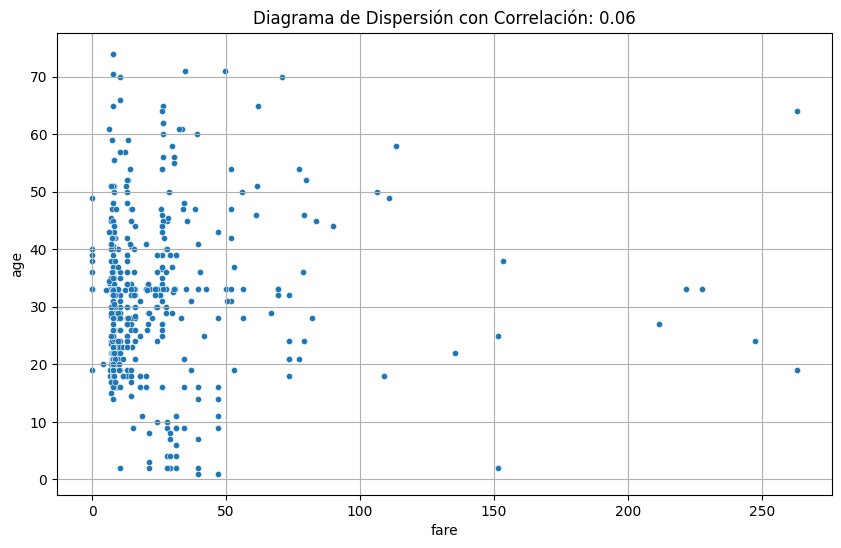

¿Ha sobrevivido?: yes


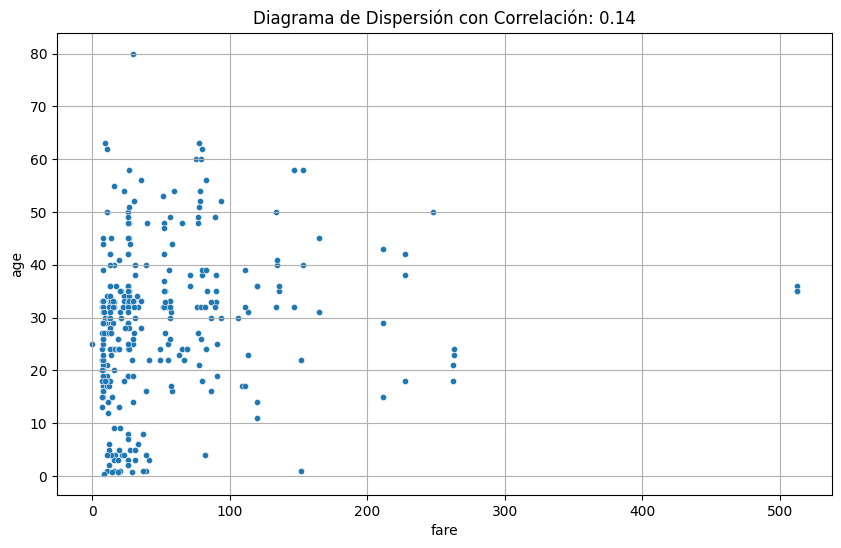

In [46]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"¿Ha sobrevivido?: {valor}")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

CONCLUSIONES:
- Parece no haber relación entre el precio del pasaje y haber sobrevivido o no.

___

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [48]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")

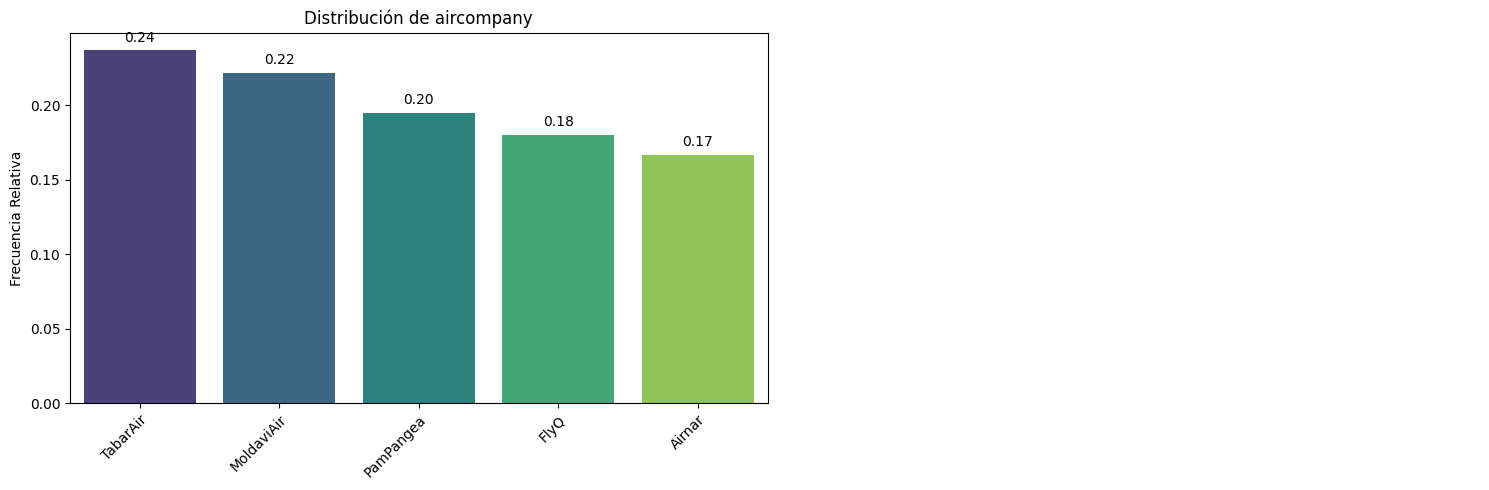

In [54]:
pinta_distribucion_categoricas_cgpt1(df_air_jun,["aircompany"], relativa= True, mostrar_valores= True)

(2,)


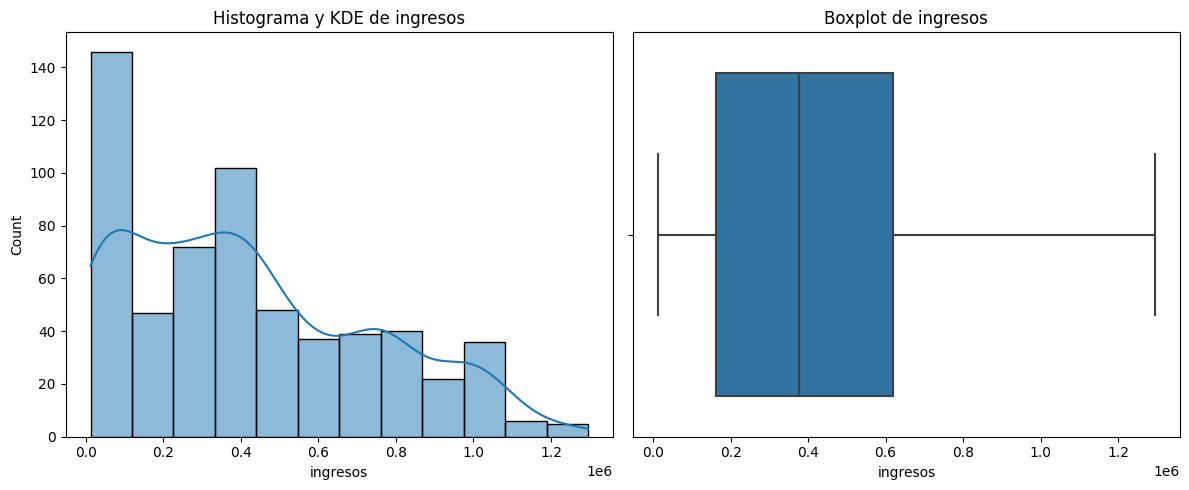

In [51]:
plot_combined_graphs(df_air_jun,["ingresos"])

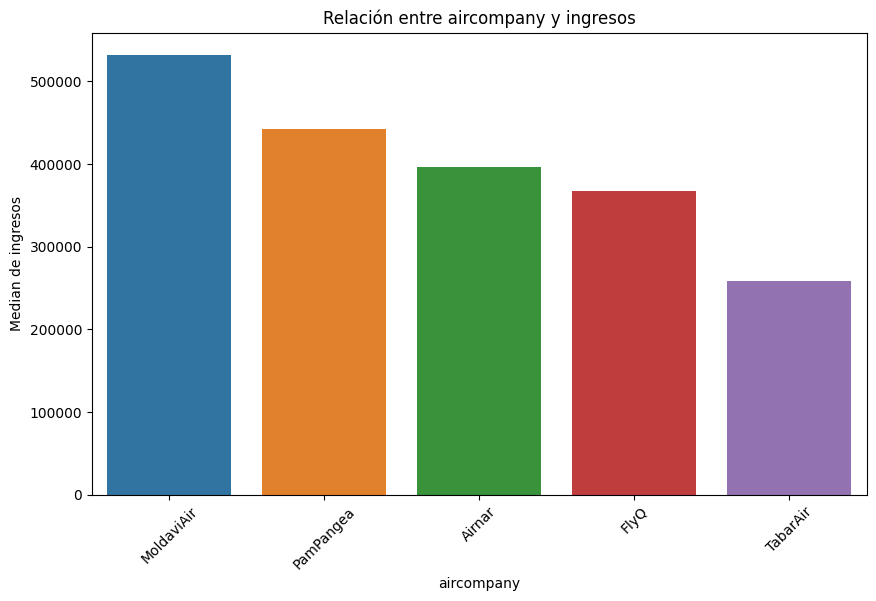

In [49]:
plot_categorical_numerical_relationship(df_air_jun, "aircompany","ingresos",measure="median")

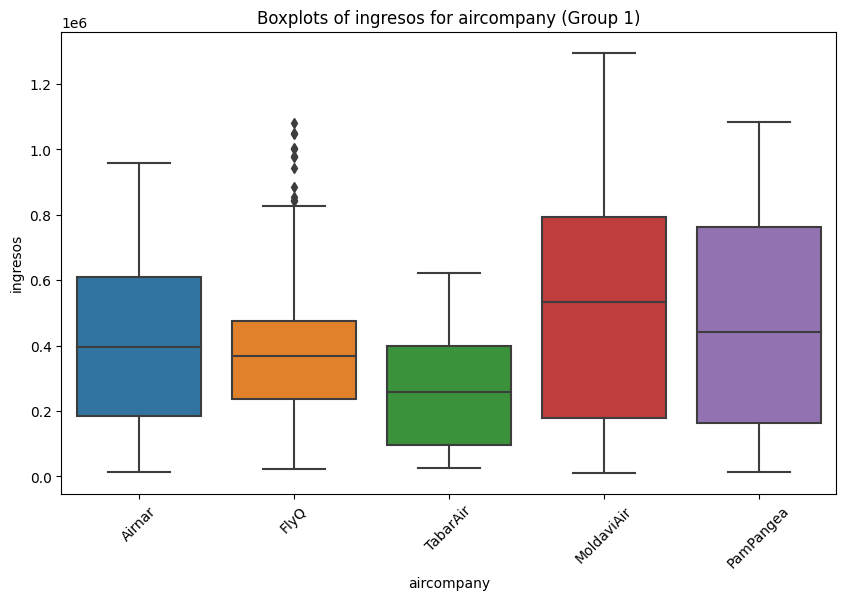

In [55]:
plot_grouped_boxplots(df_air_jun,"aircompany","ingresos")

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


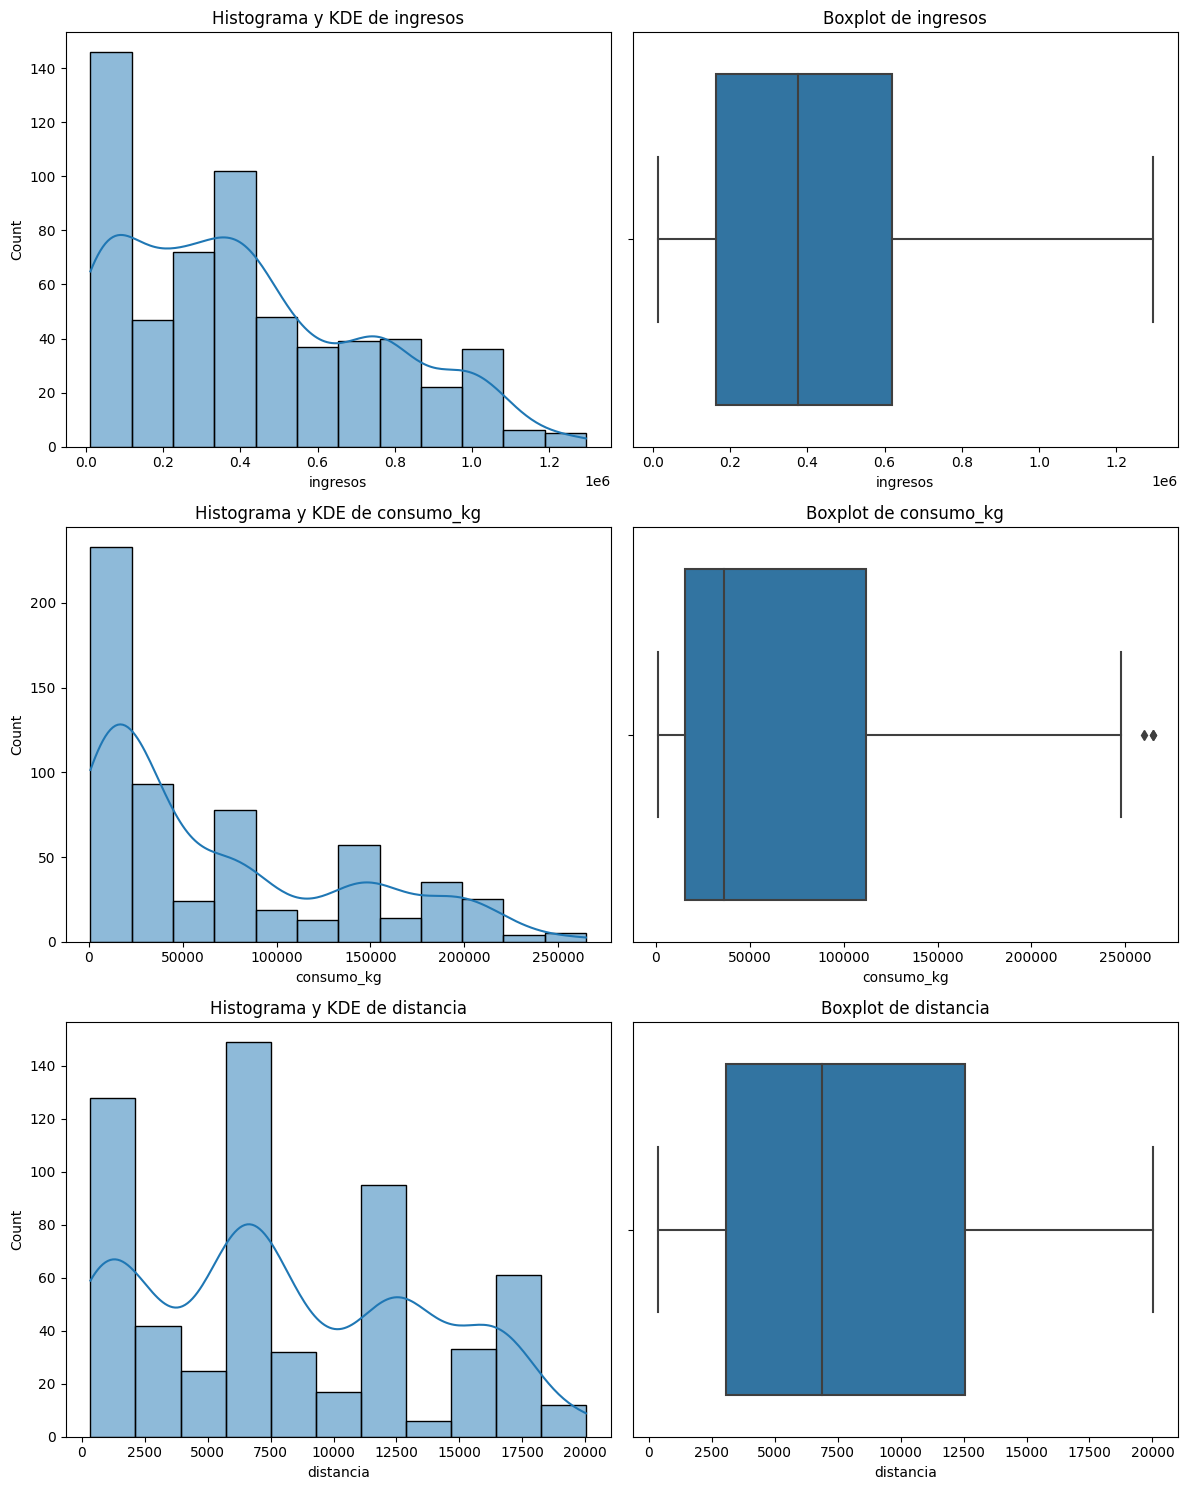

In [58]:
plot_combined_graphs(df_air_jun,["ingresos","consumo_kg","distancia"])

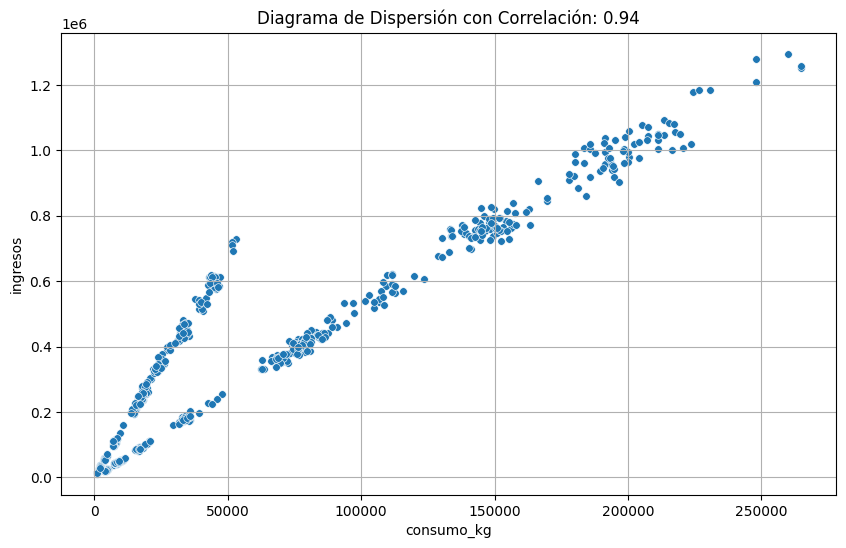

In [59]:
grafico_dispersion_con_correlacion(df_air_jun,"consumo_kg", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)

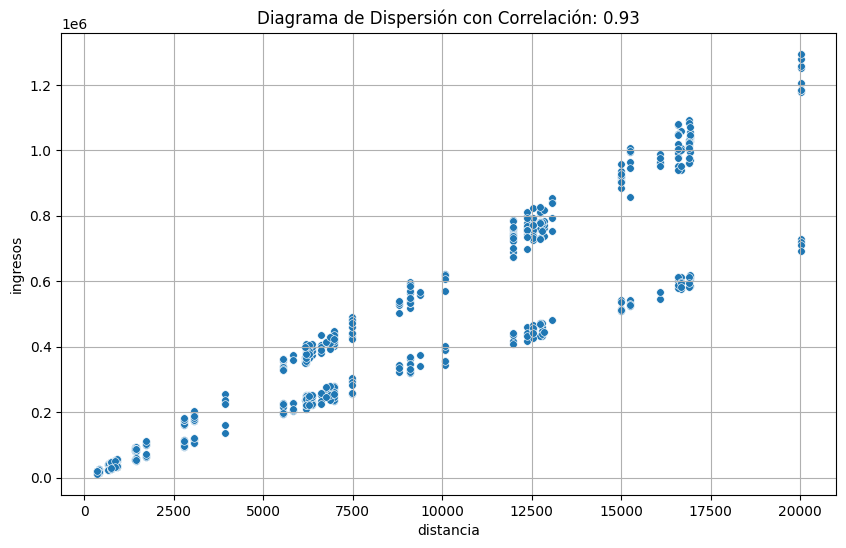

In [60]:
grafico_dispersion_con_correlacion(df_air_jun,"distancia","ingresos", mostrar_correlacion= True, tamano_puntos= 30)

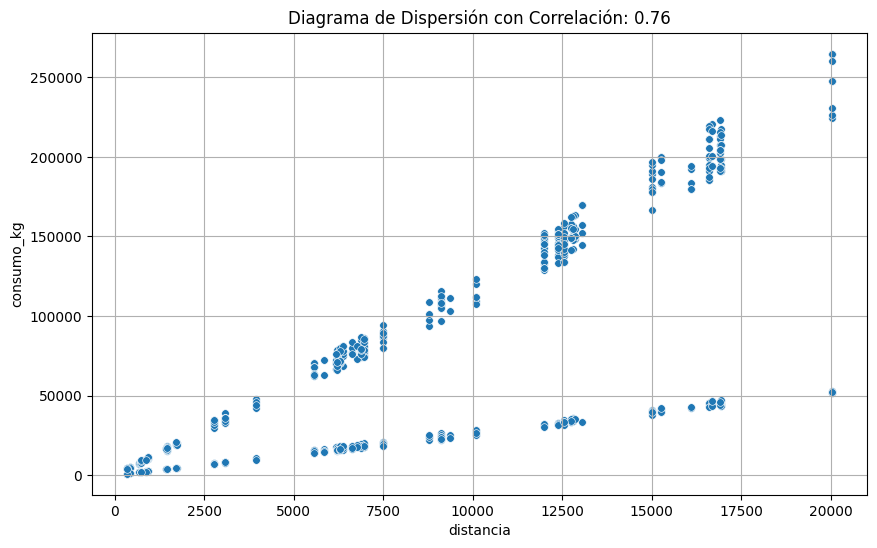

In [61]:
grafico_dispersion_con_correlacion(df_air_jun,"distancia","consumo_kg", mostrar_correlacion= True, tamano_puntos= 30)

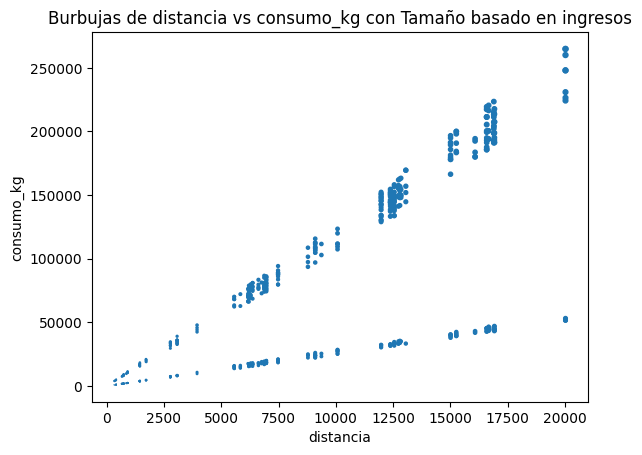

In [62]:
bubble_plot(df_air_jun,"distancia","consumo_kg","ingresos", scale = 100000)

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [67]:
df_air_jun["cat_vuelo"] = True
def categoria_vuelo(df, var1, var2):
    df.loc[df[var1] <= 5000, var2] = "PD"
    df.loc[(df[var1] > 5000) & (df[var1] <= 10000), var2] = "MD"
    df.loc[(df[var1] > 10000) & (df[var1] <= 15000), var2] = "GD" 
    df.loc[df[var1] > 15000, var2] = "SD"   
    
        

In [69]:
categoria_vuelo(df_air_jun,"distancia","cat_vuelo")

In [70]:
df_air_jun.head(5)

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,PD
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,GD
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,MD
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,MD
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,MD


In [79]:
df_air_jun.groupby(["aircompany","cat_vuelo"])[["ingresos","consumo_kg"]].mean().round(2)

ingresos  consumo_kg
aircompany cat_vuelo                       
Airnar     GD         708083.06   127377.05
           MD         389147.33    58591.82
           PD         100401.09    16692.88
           SD         759490.87   123137.02
FlyQ       GD         673269.77   112643.52
           MD         334714.33    49868.77
           PD          37473.12     5152.42
           SD         958130.69   186623.92
MoldaviAir GD         670975.65   115197.18
           MD         307085.06    44973.31
           PD          75179.04    10471.57
           SD         901305.72   155573.15
PamPangea  GD         660567.94   111053.41
           MD         274577.69    36453.21
           PD          54707.91     7344.78
           SD         840556.10   137160.00
TabarAir   GD         483878.36    67100.96
           MD         367137.89    55486.17
           PD          86337.71    13268.30

In [86]:
df_air_jun["%_consumo_ingresos"] = (df_air_jun["consumo_kg"]/df_air_jun["ingresos"]).round(2)
df_air_jun.head(5)

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo,%_consumo_ingresos
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,PD,0.07
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,GD,0.07
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,MD,0.19
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,MD,0.07
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,MD,0.20


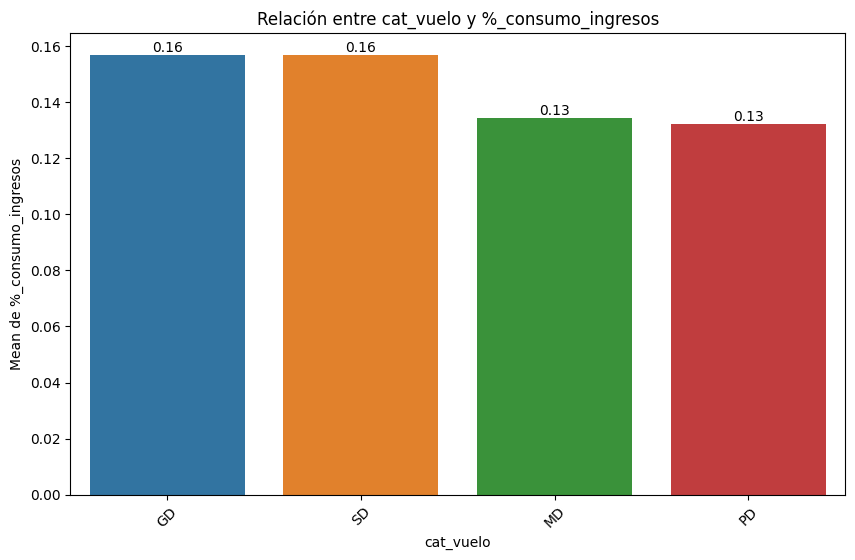

In [88]:
plot_categorical_numerical_relationship(df_air_jun,"cat_vuelo","%_consumo_ingresos",show_values=True)

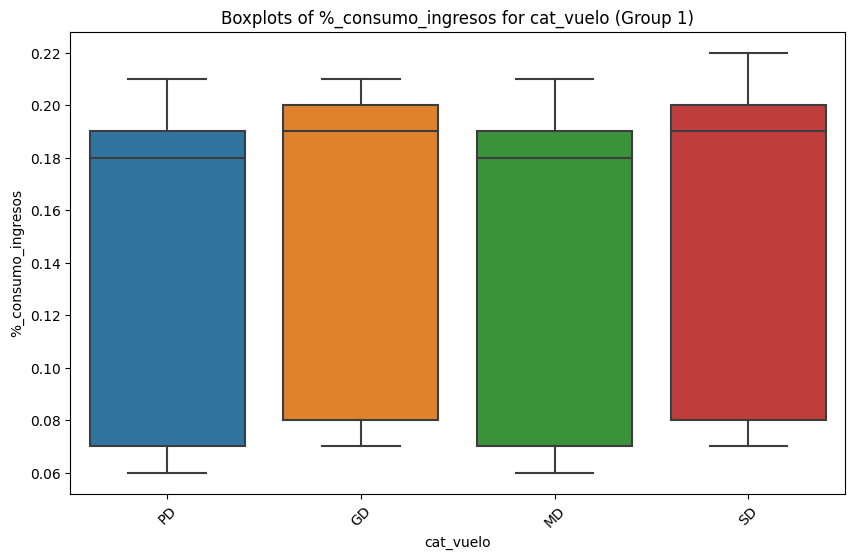

In [91]:
plot_grouped_boxplots(df_air_jun,"cat_vuelo","%_consumo_ingresos")

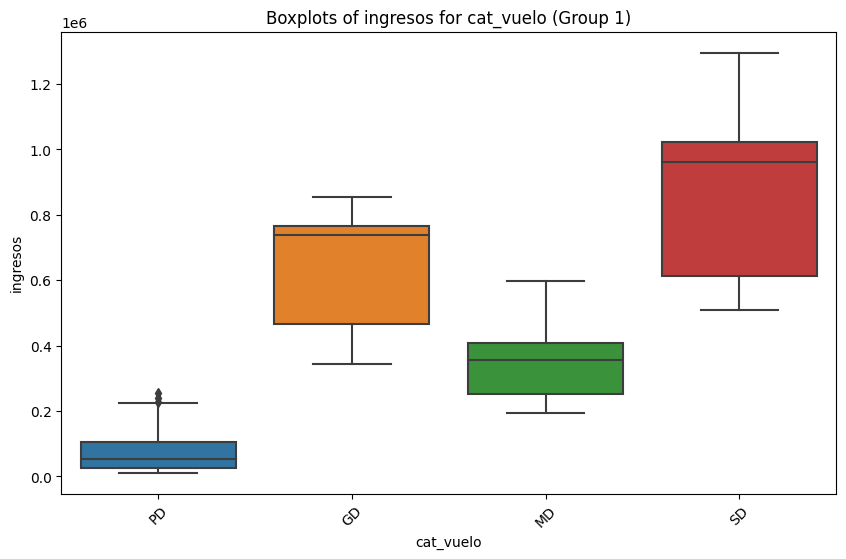

In [92]:
plot_grouped_boxplots(df_air_jun,"cat_vuelo","ingresos")

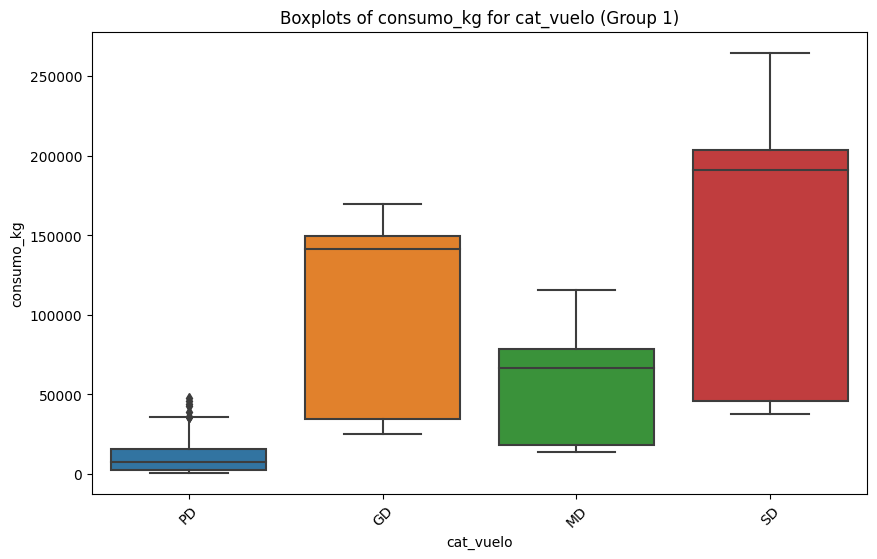

In [93]:
plot_grouped_boxplots(df_air_jun,"cat_vuelo","consumo_kg")

CONCLUSIONES:
- Parece que el ratio medio de consumo/ingreso es superior para los vuelos de GD (gran distancia) y SD(super distancia) en comparación con los de PD (pequeña distancia) y MD (media distancia).
- Parece que los vuelos de pequeña distancia (PD) y media distancia (MD) son más rentables si solo se tiene en cuenta el consumo de combustible

In [72]:
col_directora = "cat_vuelo"
col_1 = "ingresos"
col_2 = "consumo_kg"
diccionario_multivariante = {}
for valor in df_air_jun[col_directora].unique():
    diccionario_multivariante[valor] = df_air_jun.loc[df_air_jun[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Categoria PD:


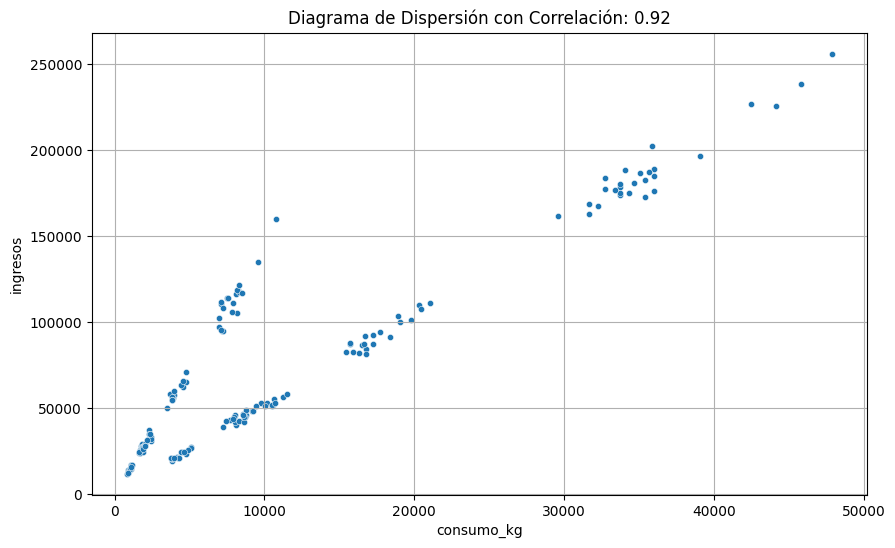

Categoria GD:


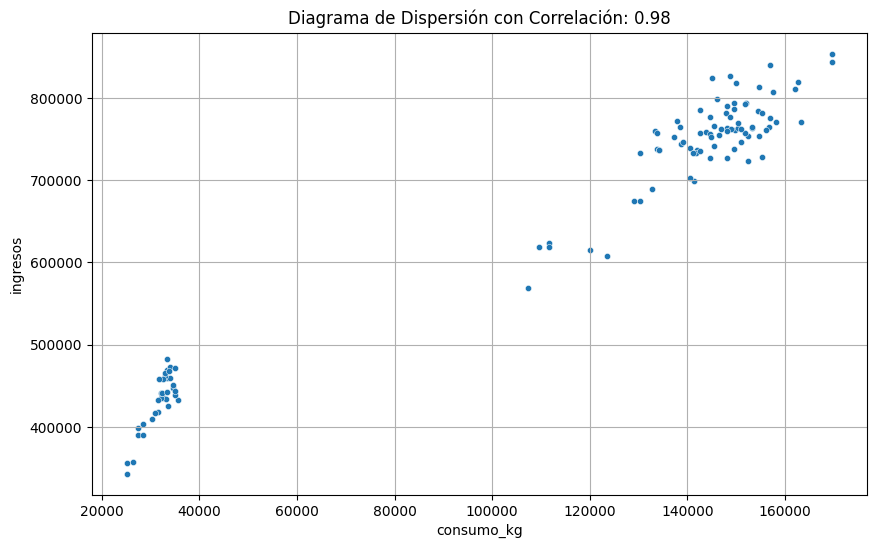

Categoria MD:


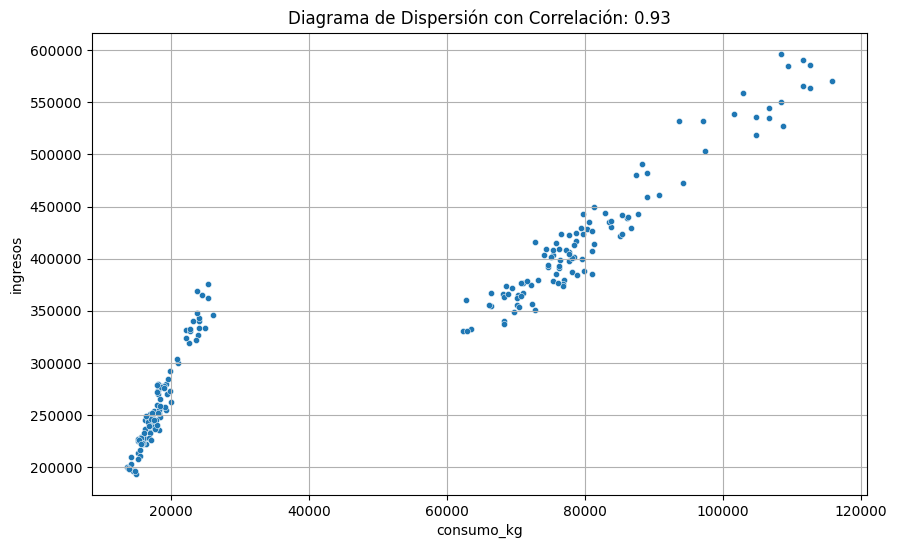

Categoria SD:


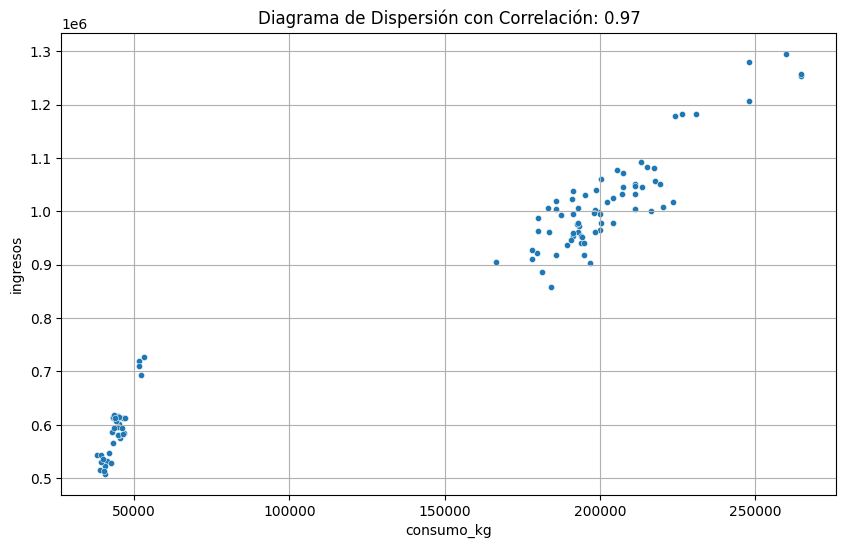

In [73]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Categoria {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.

In [94]:
df_air_jun["%_consumo_kilometro"] = (df_air_jun["consumo_kg"]/df_air_jun["distancia"]).round(2)
df_air_jun.head(5)

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo,%_consumo_ingresos,%_consumo_kilometro
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,PD,0.07,2.50
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,GD,0.07,2.63
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,MD,0.19,12.02
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,MD,0.07,2.67
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,MD,0.20,11.51


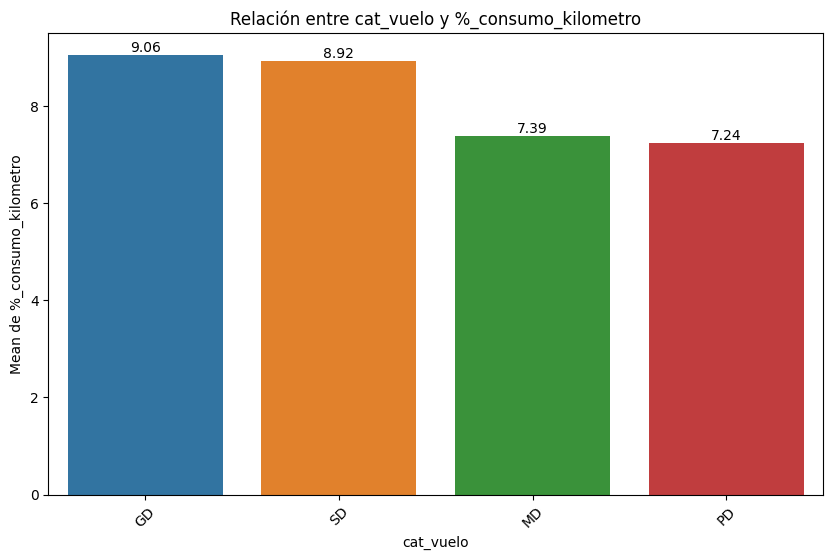

In [95]:
plot_categorical_numerical_relationship(df_air_jun,"cat_vuelo","%_consumo_kilometro",show_values=True)

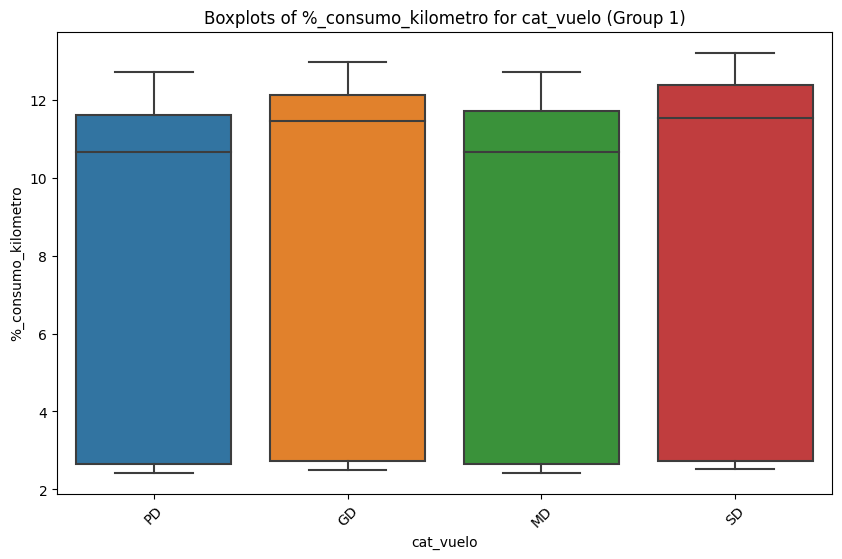

In [96]:
plot_grouped_boxplots(df_air_jun,"cat_vuelo","%_consumo_kilometro")

CONCLUSIONES:
- Parece que el ratio medio de consumo por kilómetro es superior para los vuelos de GD (gran distancia) y SD(super distancia) en comparación con los de PD (pequeña distancia) y MD (media distancia).
- Parece que los vuelos de pequeña distancia (PD) y media distancia (MD) son más rentables si solo se tiene en cuenta el consumo de combustible